In [1]:
import matplotlib.pyplot as plt
%pylab inline
import os
import random
import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
_src = "train/"
_ext = ".jpg"

In [3]:
root_dir = os.path.abspath('.')

In [4]:
train=pd.read_csv(os.path.join(root_dir,'train.csv'))
test=pd.read_csv(os.path.join(root_dir,'test.csv'))

In [5]:
i = random.choice(train.index)
img_name = train.ID[i]
img = imread(os.path.join(root_dir, 'train', img_name),flatten=True)

print('Age:', train.Class[i])

/home/shadowk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Age: MIDDLE


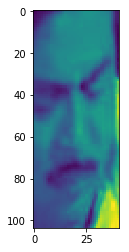

In [6]:
imshow(img)

In [7]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(root_dir, 'train', img_name)
    img = imread(img_path)
    img = imresize(img, (64, 64, 1))
    img = img.astype('float32') 
    temp.append(img)

train_x = np.stack(temp)

/home/shadowk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/shadowk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [8]:
train_x.shape

(19906, 64, 64, 3)

In [9]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(root_dir, 'test', img_name)
    img = imread(img_path)
    img = imresize(img, (64, 64, 1))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)


train_x = train_x / 255.
test_x = test_x / 255.

/home/shadowk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/shadowk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


MemoryError: 

In [ ]:
train.Class.value_counts()

In [ ]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)

In [ ]:
train_y.shape

In [ ]:
train_y = keras.utils.np_utils.to_categorical(train_y)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

classifier = Sequential()

classifier.add(Conv2D(50, (5, 5), input_shape = (64, 64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(100, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(100, (5, 5), activation = 'relu'))

classifier.add(Flatten())


classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



epochs = 20
batch_size = 512

classifier.fit(
                train_x, train_y, 
                nb_epoch=epochs, 
                batch_size=batch_size
            )



In [ ]:
pred = classifier.predict_classes(test_x)

In [ ]:
test['Class']=1

In [ ]:
for i in test.index:
    test['Class'][i]=lb.inverse_transform(pred[i])

In [ ]:
test = test.reindex_axis(sorted(test.columns), axis=1)
test.to_csv('two1.csv')